In [137]:
%run Data_file

done


In [138]:
masses_upper_error = []
matching_sources = []
matching_sources_masses = []
matching_sources_flux = []

#find points that have to be red by finding sources that match in Barenfeld and Garrett
for x in range(len(source_list_garrett)):
    for z in range(len(source_list_barenfeld_2016)):
        if source_list_garrett[x] == source_list_barenfeld_2016[z]:
            matching_sources.append(source_list_barenfeld_2016[z])
            matching_sources_flux.append(flux_barenfeld_0_88mm[z])

indices = []
arrows_fluxes = []
arrows_temperature = []
arrows_temperature_error = []
arrows_temperature_error_plot = []
#find fluxes with lower bound < 0
for x in range(len(flux_barenfeld_0_88mm)):
    if 3*(flux_barenfeld_0_88_error[x]) >= flux_barenfeld_0_88mm[x]:
        arrows_fluxes.append(3 * flux_barenfeld_0_88_error[x])
        arrows_temperature.append(temperature_list_barenfeld[x])
        arrows_temperature_error.append(temperature_list_barenfeld_error[x])
        #add their position in the list to a list to use later
        indices.append(x)


#inverse order of indices added so that it does not delete from the first one and creates a list too short and can not pop the lasts ones
indices.reverse()
for x in indices:
    flux_barenfeld_0_88mm.pop(x)
    flux_barenfeld_0_88_error.pop(x)
    temperature_list_barenfeld.pop(x)
    temperature_list_barenfeld_error.pop(x)

#create values for errobars
temperature_error = []
for x in range(len(temperature_list_barenfeld)):
    temperature_error.append(10**(temperature_list_barenfeld[x] + temperature_list_barenfeld_error[x]) -
                             10**(temperature_list_barenfeld[x]))

for x in range(len(arrows_temperature_error)):
    arrows_temperature_error_plot.append(10**(arrows_temperature_error[x] + arrows_temperature[x]) - 10**(arrows_temperature[x]))

#get rid of log in temperatures
temperature_list_barenfeld = [10 ** x for x in temperature_list_barenfeld]
temperature_list_barenfeld_updated = [10 ** x for x in temperature_list_barenfeld_updated]
temperature_list_barenfeld_error = [10 ** x for x in temperature_list_barenfeld_error]
arrows_temperature = [10 ** x for x in arrows_temperature]


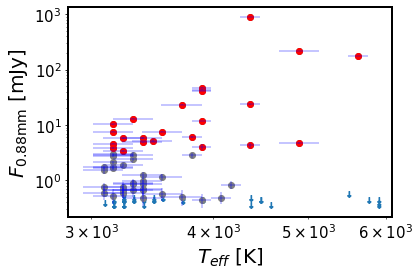

(None, None)

In [139]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

#avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

#manipulate trasnparency errobars
kwargs_errobar = {'alpha':0.3}

#create down pointing arrows
plt.scatter(arrows_temperature, arrows_fluxes, marker=r'$\downarrow$')

#errorbar for arrows
#plt.errorbar(arrows_temperature, arrows_fluxes, xerr=arrows_temperature_error_plot, ls='none')
plt.scatter(temperature_list_barenfeld, flux_barenfeld_0_88mm, c='gray')
plt.scatter(temperature_list_barenfeld_updated, matching_sources_flux, c='red')
plt.errorbar(temperature_list_barenfeld, flux_barenfeld_0_88mm, yerr=flux_barenfeld_0_88_error, ls='none', c='blue',
             **kwargs_errobar)
plt.errorbar(temperature_list_barenfeld, flux_barenfeld_0_88mm, xerr=temperature_error, ls='none', c='blue',
             **kwargs_errobar)
plt.ylabel(r'$F_{0.88\rm mm}$ [mJy]', fontsize=20), plt.xlabel(r'$T_{eff}\rm\ [K]$', fontsize=20)
plt.yscale('log'), plt.xscale('log')
ax.tick_params(which='both', labelsize=15)
plt.savefig('Fig 1 new'), plt.show()
